In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dat = pd.read_csv("data.csv")
mycolumns = ['EducationSector',
'Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth']
donne = dat[mycolumns]

mycolumn = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth','y']
donne1 = dat[mycolumn]
donne1


,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
0,19,2,2,3,3,2,2,3,1
1,22,3,3,3,4,4,3,4,0
2,18,3,4,3,3,3,4,4,0
3,20,3,3,3,3,4,3,3,0
4,19,2,3,3,3,4,3,2,1
...,...,...,...,...,...,...,...,...,...
214,19,4,5,4,3,4,4,5,1
215,19,2,2,2,2,2,2,2,0
216,22,3,4,4,3,4,4,3,1
217,19,1,2,2,3,3,2,2,0


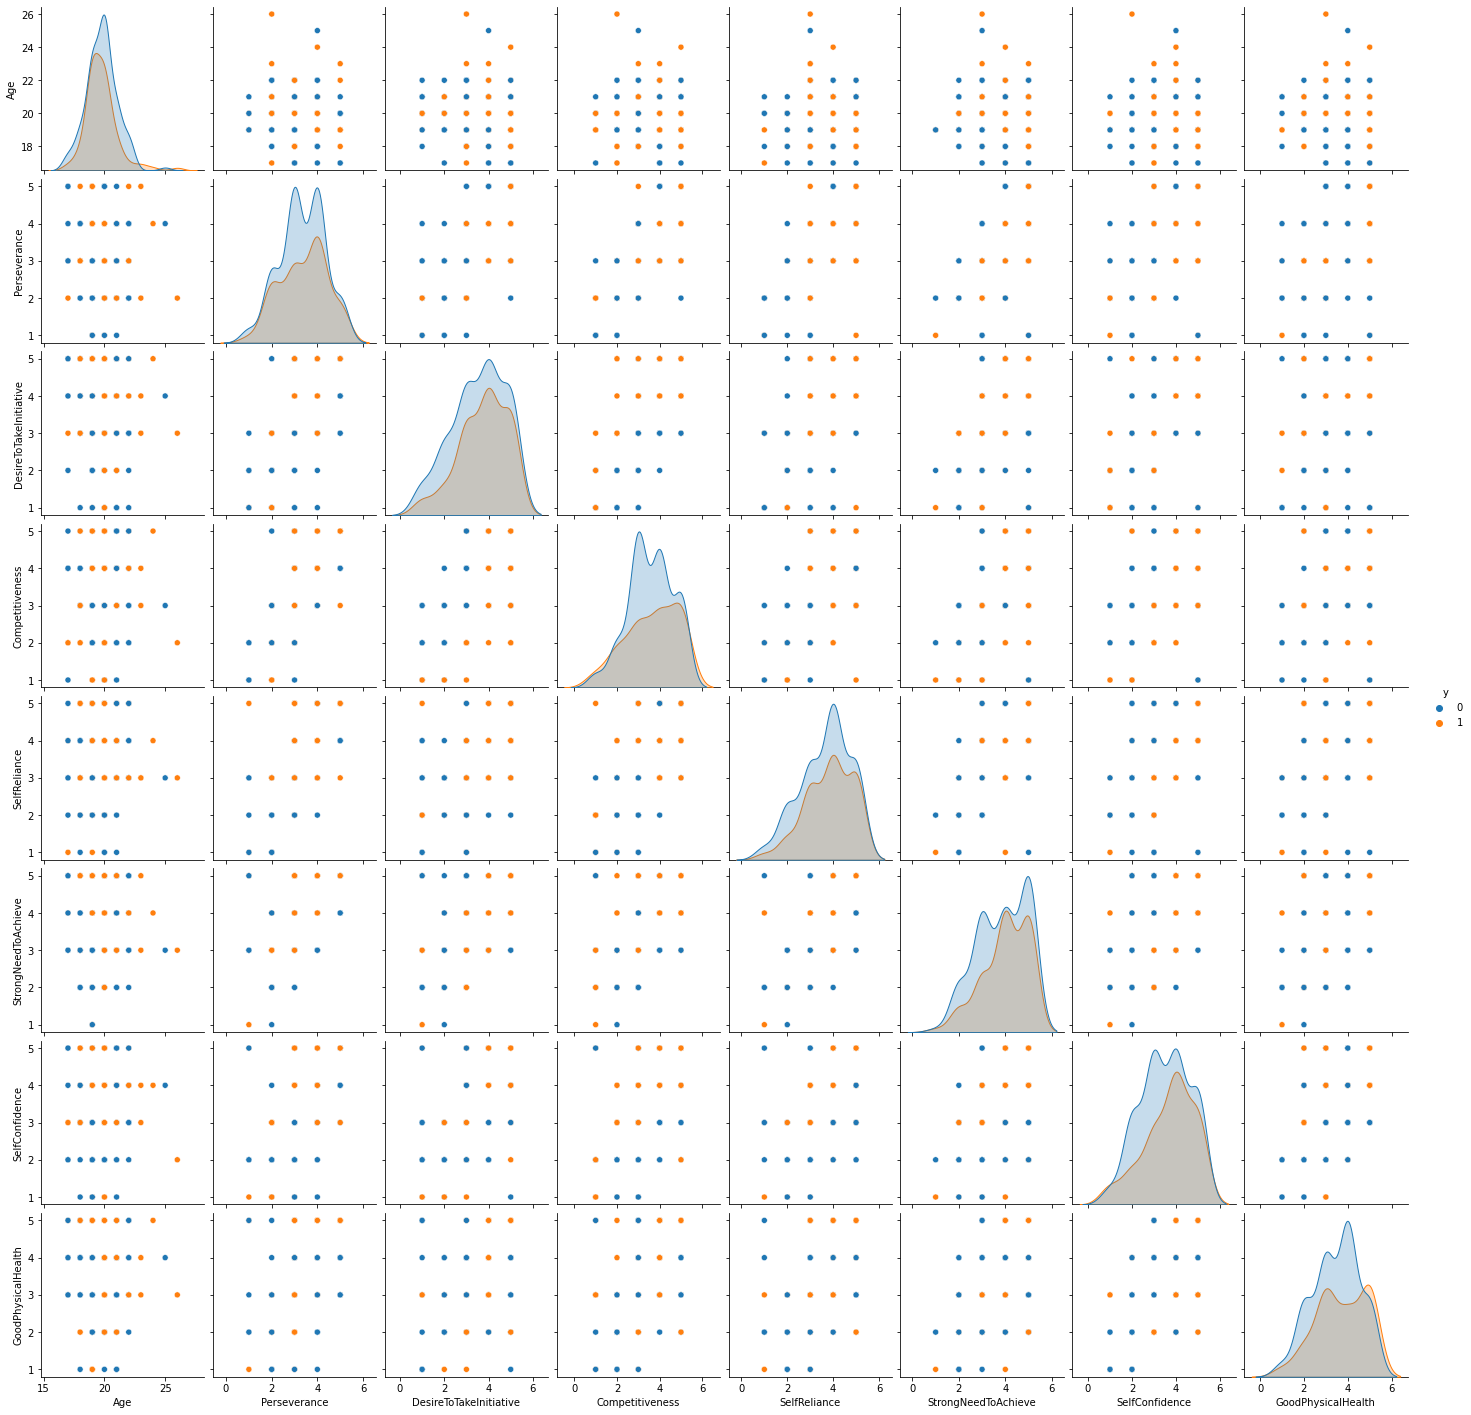

In [2]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=donne1, hue = 'y')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy

# suppression des colonnes non numériques
dat = pd.read_csv("data.csv")
mycolumn = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth']
donne1 = dat[mycolumn]
pca = PCA()
pca.fit(donne1)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(8)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig



[5.44835942 1.67692644 0.71866336 0.5369137  0.47862635 0.37435863
 0.32584599 0.2787293 ]
[0.5537838  0.17044667 0.0730466  0.05457315 0.04864868 0.03805067
 0.03311974 0.02833069]


,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.448359,55.0,55.0
1,Dim2,1.676926,17.0,72.0
2,Dim3,0.718663,7.0,80.0
3,Dim4,0.536914,5.0,85.0
4,Dim5,0.478626,5.0,90.0
5,Dim6,0.374359,4.0,94.0
6,Dim7,0.325846,3.0,97.0
7,Dim8,0.278729,3.0,100.0


In [4]:
WGI_pca = pca.transform(donne1)

# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "EducationSector" : dat["EducationSector"],
     "Gender" : dat["Gender"]
})

# Résultat (premières lignes)
WGI_pca_df.head()

,Dim1,Dim2,EducationSector,Gender
0,3.142352,-0.652527,Engineering Sciences,Male
1,0.567553,2.263106,Engineering Sciences,Male
2,0.470217,-1.796956,Engineering Sciences,Male
3,1.280447,0.212085,Engineering Sciences,Male
4,1.970799,-0.785799,Engineering Sciences,Male


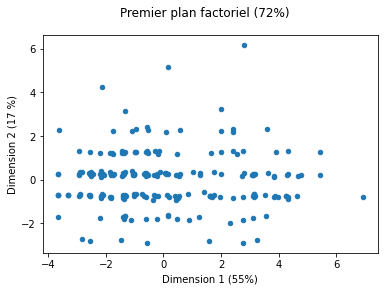

In [5]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (55%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (17 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (72%)") # titre général
plt.show()



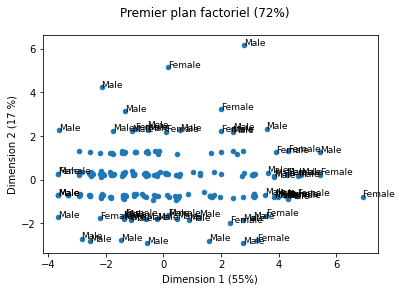

In [6]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Gender"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (55%)") 
plt.ylabel("Dimension 2 (17 %)")
plt.suptitle("Premier plan factoriel (72%)")
plt.show()



In [7]:


# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(WGI_pca_df["EducationSector"].drop_duplicates(), palette(range(9))))
couleurs



{'Engineering Sciences': array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 'Others': array([0.85098039, 0.37254902, 0.00784314, 1.        ]),
 'Economic Sciences, Business Studies, Commerce and Law': array([0.45882353, 0.43921569, 0.70196078, 1.        ]),
 'Art, Music or Design': array([0.90588235, 0.16078431, 0.54117647, 1.        ]),
 'Humanities and Social Sciences': array([0.4       , 0.65098039, 0.11764706, 1.        ]),
 'Medicine, Health Sciences': array([0.90196078, 0.67058824, 0.00784314, 1.        ]),
 'Teaching Degree (e.g., B.Ed)': array([0.65098039, 0.4627451 , 0.11372549, 1.        ]),
 'Mathematics or Natural Sciences': array([0.4, 0.4, 0.4, 1. ]),
 'Language and Cultural Studies': array([0.4, 0.4, 0.4, 1. ])}

In [8]:
position = dict(zip(couleurs.keys(), range(9)))
position

{'Engineering Sciences': 0,
 'Others': 1,
 'Economic Sciences, Business Studies, Commerce and Law': 2,
 'Art, Music or Design': 3,
 'Humanities and Social Sciences': 4,
 'Medicine, Health Sciences': 5,
 'Teaching Degree (e.g., B.Ed)': 6,
 'Mathematics or Natural Sciences': 7,
 'Language and Cultural Studies': 8}

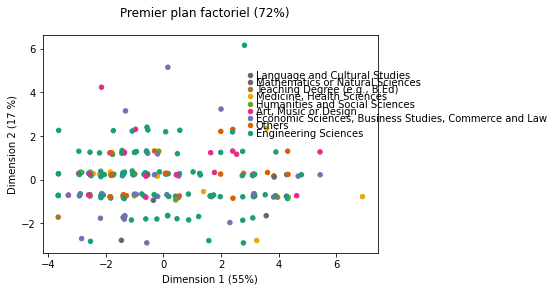

In [9]:


# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in WGI_pca_df["EducationSector"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1 (55%)") 
plt.ylabel("Dimension 2 (17 %)")
plt.suptitle("Premier plan factoriel (72%)")
plt.show()



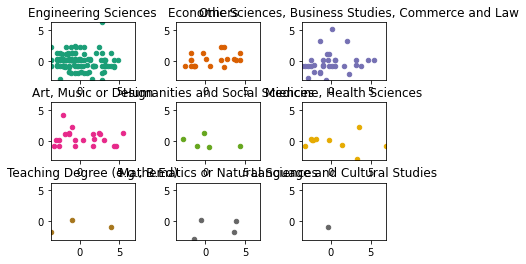

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.5)
for cont, coul in couleurs.items():
    ax = fig.add_subplot(3, 3, position[cont] + 1)
    temp = WGI_pca_df.query('EducationSector == "' + cont + '"')
    temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
    ax.set_title(cont)
    ax.set_xlim(WGI_pca_df.Dim1.quantile([0, 1])) # permet d'avoir min et max
    ax.set_ylim(WGI_pca_df.Dim2.quantile([0, 1])) # idem
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()

In [13]:
n = donne1.shape[0] # nb individus
p = donne1.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
print(eigval)
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': donne1.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

[5.42348107 1.66926924 0.71538179 0.53446204 0.47644084 0.37264923
 0.32435811 0.27745656]


,id,COR_1,COR_2
0,Age,0.010922,1.285308
1,Perseverance,-0.814551,-0.015954
2,DesireToTakeInitiative,-0.964028,-0.082697
3,Competitiveness,-0.941614,0.070373
4,SelfReliance,-0.877968,0.059394
5,StrongNeedToAchieve,-0.823828,-0.035764
6,SelfConfidence,-0.920761,0.001951
7,GoodPhysicalHealth,-0.804090,0.019913


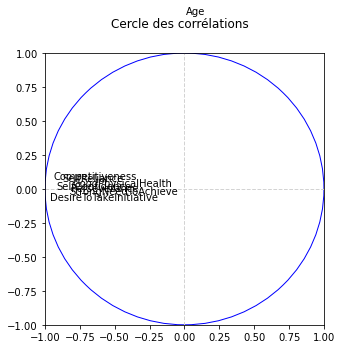

In [12]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (5,5))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()


In [85]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(donne1)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [83]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


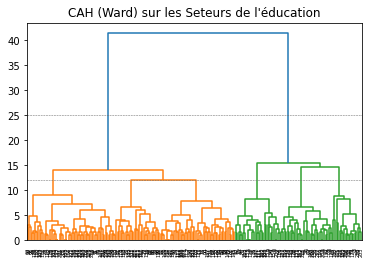

In [120]:
plt.title("CAH (Ward) Choix ")
# plot the top three levels of the dendrogram
plot_dendrogram(hac)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 12, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

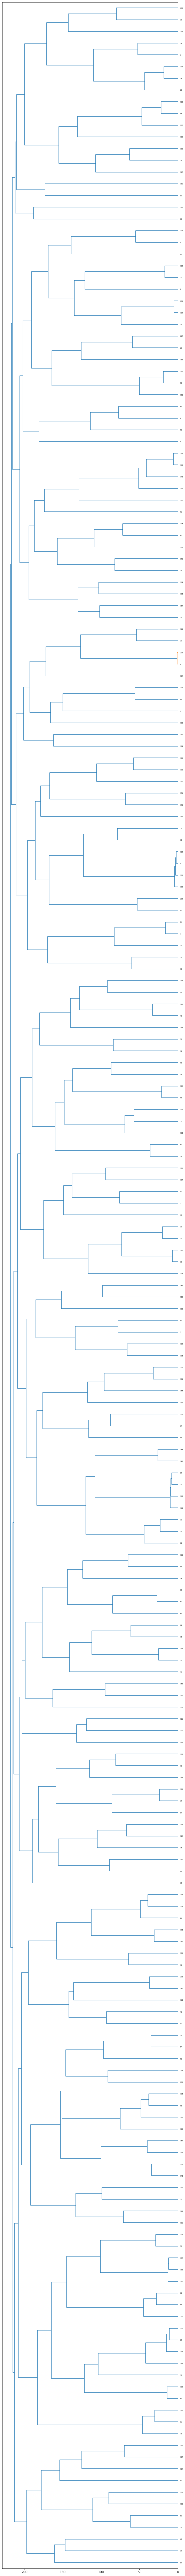

In [126]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(donne1)
dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])

fig = plt.figure(figsize=(10, 150))
ax = fig.add_subplot(1, 1, 1)
r = dendrogram(dendro, color_threshold=2, labels=list(donne1.index),
               show_leaf_counts=False, ax=ax, orientation="left")

In [113]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(donne1)

KMeans(n_clusters=2)

In [53]:
pd.Series(kmeans2.labels_).value_counts()

1    149
0     70
dtype: int64

In [54]:
kmeans2.cluster_centers_

array([[19.68571429,  2.3       ,  2.37142857,  2.42857143,  2.57142857,
         2.81428571,  2.44285714,  2.6       ],
       [19.7852349 ,  3.84563758,  4.20805369,  4.13422819,  4.26174497,
         4.42281879,  4.10738255,  4.01342282]])

In [55]:
WGI_k2 = donne1.assign(classe = kmeans2.labels_)
WGI_k2.groupby("classe").mean()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
classe,,,,,,,,
0,19.685714,2.300000,2.371429,2.428571,2.571429,2.814286,2.442857,2.600000
1,19.785235,3.845638,4.208054,4.134228,4.261745,4.422819,4.107383,4.013423


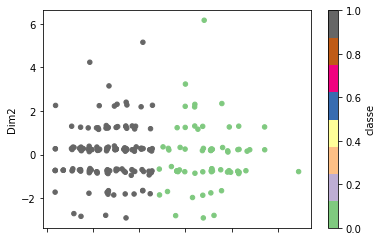

In [56]:
WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans2.labels_)
WGI_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

In [57]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(donne1)

KMeans(n_clusters=3)

In [58]:
pd.Series(kmeans3.labels_).value_counts()

2    102
1     66
0     51
dtype: int64

In [59]:
WGI_k3 = donne1.assign(classe = kmeans3.labels_)
WGI_k3.groupby("classe").mean()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
classe,,,,,,,,
0,21.019608,3.490196,3.725490,3.705882,3.980392,4.196078,3.470588,3.686275
1,19.500000,2.318182,2.363636,2.439394,2.515152,2.772727,2.393939,2.560606
2,19.284314,3.950980,4.382353,4.274510,4.372549,4.500000,4.392157,4.147059


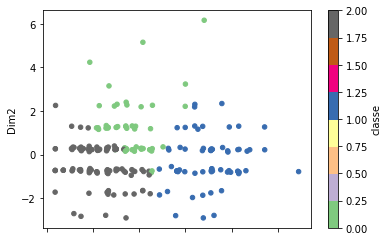

In [60]:
WGI_pca_k3 = WGI_pca_df.assign(classe = kmeans3.labels_)
WGI_pca_k3.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

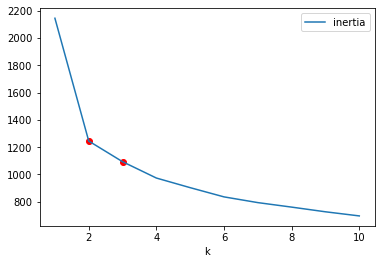

In [61]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(donne1)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.show()

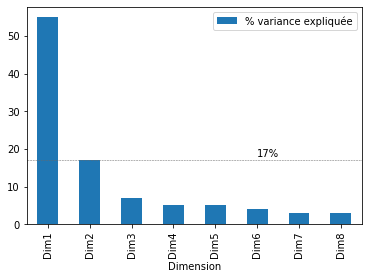

In [62]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()